['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

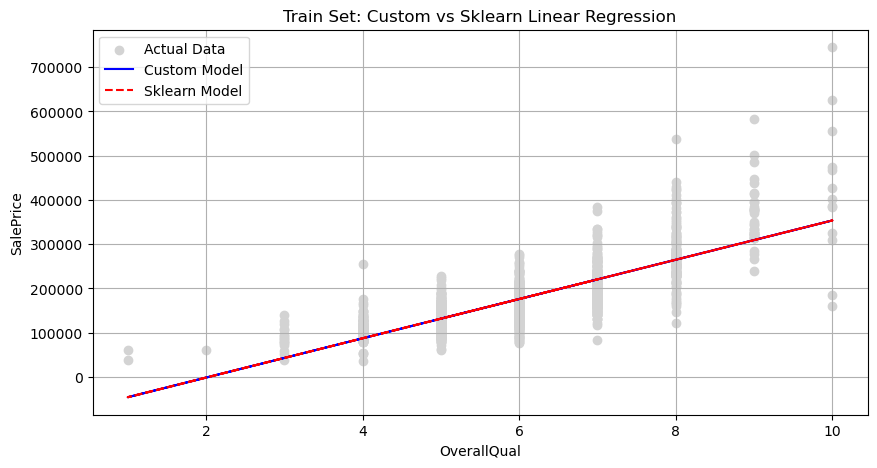

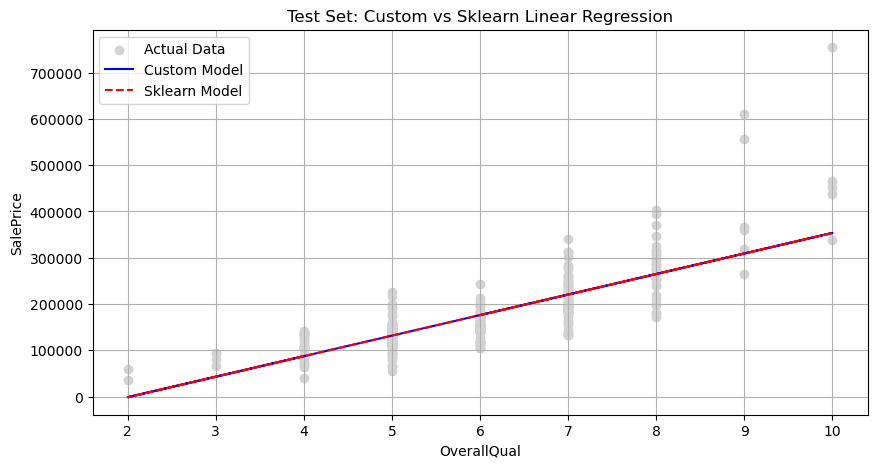

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
df = pd.read_csv('train.csv')
print(df.columns.tolist())
X = df[['OverallQual']].values 
y = df['SalePrice'].values     
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
def train_linear_regression_scratch(X, y):
    x = X.flatten()
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean) ** 2)
    m = numerator / denominator
    b = y_mean - m * x_mean
    return m, b
m_scratch, b_scratch = train_linear_regression_scratch(X_train, y_train)
def predict_scratch(X, m, b):
    return m * X.flatten() + b
y_pred_train_scratch = predict_scratch(X_train, m_scratch, b_scratch)
y_pred_test_scratch = predict_scratch(X_test, m_scratch, b_scratch)
mse_scratch = mean_squared_error(y_test, y_pred_test_scratch)
print(f"MSE (Custom Model): {mse_scratch:.2f}")
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_train_sklearn = model.predict(X_train)
y_pred_test_sklearn = model.predict(X_test)
mse_sklearn = mean_squared_error(y_test, y_pred_test_sklearn)
print(f"MSE (Sklearn Model): {mse_sklearn:.2f}")
plt.figure(figsize=(10, 5))
plt.scatter(X_train, y_train, color='lightgray', label='Actual Data')
plt.plot(X_train, y_pred_train_scratch, color='blue', label='Custom Model')
plt.plot(X_train, y_pred_train_sklearn, color='red', linestyle='--', label='Sklearn Model')
plt.title("Train Set: Custom vs Sklearn Linear Regression")
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='lightgray', label='Actual Data')
plt.plot(X_test, y_pred_test_scratch, color='blue', label='Custom Model')
plt.plot(X_test, y_pred_test_sklearn, color='red', linestyle='--', label='Sklearn Model')
plt.title("Test Set: Custom vs Sklearn Linear Regression")
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.legend()
plt.grid(True)
plt.show()



--- Custom Logistic Regression ---
Accuracy: 0.83
Precision: 0.83
Recall: 1.0
F1-score: 0.907103825136612


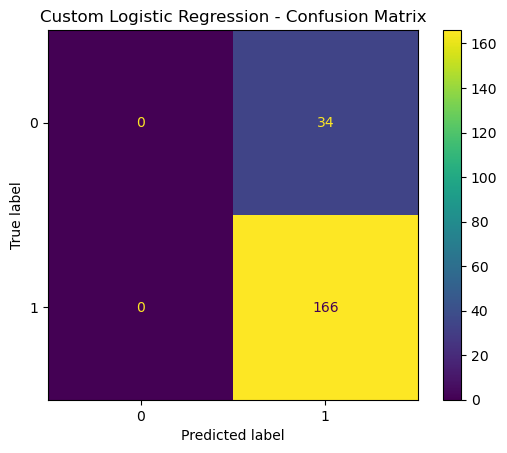


--- Sklearn Logistic Regression ---
Accuracy: 0.865
Precision: 0.888268156424581
Recall: 0.9578313253012049
F1-score: 0.9217391304347826


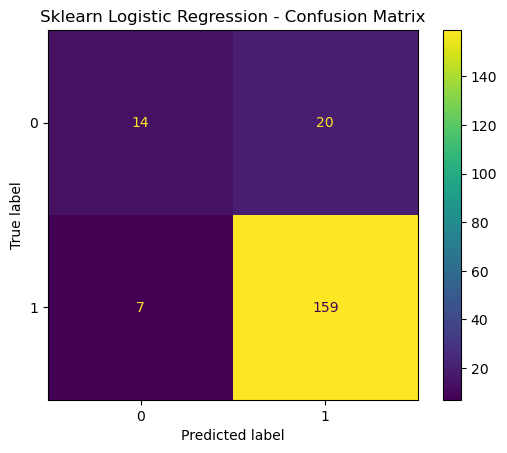

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    ConfusionMatrixDisplay,
)
df = pd.read_csv('StudentsPerformance.csv')
df['PassedMath'] = (df['math score'] >= 50).astype(int)
X = df[['reading score']].values
y = df['PassedMath'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def train_logistic_regression(X, y, lr=0.01, iterations=1000):
    m = X.shape[0]
    X_bias = np.hstack((np.ones((m, 1)), X))  # Add bias term
    weights = np.zeros(X_bias.shape[1])
    for _ in range(iterations):
        z = np.dot(X_bias, weights)
        predictions = sigmoid(z)
        gradient = np.dot(X_bias.T, predictions - y) / m
        weights -= lr * gradient
    return weights
weights = train_logistic_regression(X_train, y_train)
def predict_custom(X, weights):
    X_bias = np.hstack((np.ones((X.shape[0], 1)), X))
    probs = sigmoid(np.dot(X_bias, weights))
    return (probs >= 0.5).astype(int), probs
y_pred_custom, y_probs_custom = predict_custom(X_test, weights)
print("\n--- Custom Logistic Regression ---")
print("Accuracy:", accuracy_score(y_test, y_pred_custom))
print("Precision:", precision_score(y_test, y_pred_custom))
print("Recall:", recall_score(y_test, y_pred_custom))
print("F1-score:", f1_score(y_test, y_pred_custom))
cm_custom = confusion_matrix(y_test, y_pred_custom)
disp_custom = ConfusionMatrixDisplay(confusion_matrix=cm_custom, display_labels=[0, 1])
disp_custom.plot()
plt.title("Custom Logistic Regression - Confusion Matrix")
plt.show()
sk_model = LogisticRegression()
sk_model.fit(X_train, y_train)
y_pred_sklearn = sk_model.predict(X_test)
print("\n--- Sklearn Logistic Regression ---")
print("Accuracy:", accuracy_score(y_test, y_pred_sklearn))
print("Precision:", precision_score(y_test, y_pred_sklearn))
print("Recall:", recall_score(y_test, y_pred_sklearn))
print("F1-score:", f1_score(y_test, y_pred_sklearn))
cm_sklearn = confusion_matrix(y_test, y_pred_sklearn)
disp_sklearn = ConfusionMatrixDisplay(confusion_matrix=cm_sklearn, display_labels=[0, 1])
disp_sklearn.plot()
plt.title("Sklearn Logistic Regression - Confusion Matrix")
plt.show()
